<a href="https://colab.research.google.com/github/SabAneesah/machine-vision-intensity-transformations/blob/main/Machine_Vision_pt2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Machine Vision Assignment 1 - Part 2

In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [2]:
import os
from PIL import Image
import matplotlib.pyplot as plt

image_folder_path = '/content/drive/MyDrive/Images'

if not os.path.exists(image_folder_path):
    print(f"Error: The folder '{image_folder_path}' does not exist. Please check the path and ensure it's created and accessible.")
else:
    print(f"Accessing folder: {image_folder_path}")

Accessing folder: /content/drive/MyDrive/Images


In [3]:
import cv2
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D

In [15]:
def show(img, title='', cmap='gray'):
    plt.imshow(img, cmap=cmap)
    plt.title(title)
    plt.axis('off')


4. Otsu + Foreground Equalization

In [45]:
# Read Image from Drive
img_woman = cv2.imread('/content/drive/MyDrive/Images/looking_out.jpg', cv2.IMREAD_GRAYSCALE) # Read image in grayscale

# Check if image loaded successfully before proceeding
if img_woman is None:
    print(f"Error: Could not load image 'looking_out.jpg' from '/content/drive/MyDrive/Images/'. Please check if the file exists and the path is correct.")
else:
    _, mask = cv2.threshold(img_woman, 0, 255, cv2.THRESH_BINARY + cv2.THRESH_OTSU) # Note: Otsu usually works better on original intensity values, not normalized
    print("Otsu Threshold:", _)

Otsu Threshold: 101.0


*4. part (b)*

In [46]:
def manual_hist_eq(img):
    hist, bins = np.histogram(img.flatten(), 256, [0, 256])

    # Calculate Cumulative Distribution Function (CDF)
    cdf = hist.cumsum()

    # Normalize CDF to 0-255
    cdf_normalized = (cdf - cdf.min()) * 255 / (cdf.max() - cdf.min())
    cdf_normalized = cdf_normalized.astype('uint8')

    # Apply equalization using the normalized CDF as a lookup table
    img_equalized = cdf_normalized[img.astype('uint8')]
    return img_equalized

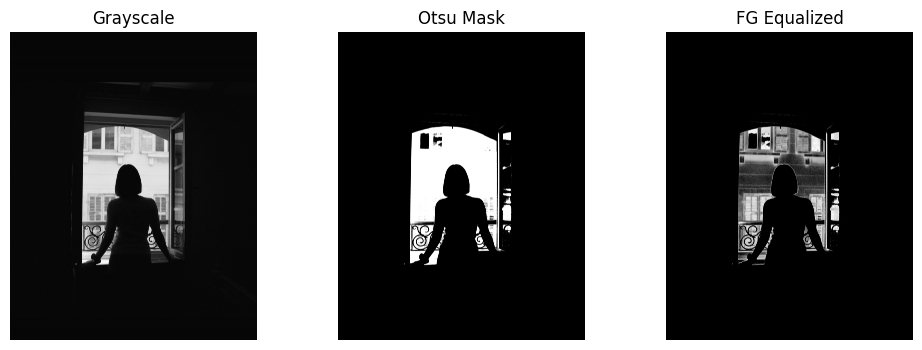

In [47]:
fg = img_woman.copy()
fg[mask == 0] = 0

# Before equalizing, rescale fg to 0-255 since manual_hist_eq expects 0-255 range
fg_rescaled = (fg * 255).astype(np.uint8)

fg_eq_rescaled = manual_hist_eq(fg_rescaled)
fg_eq = fg_eq_rescaled / 255.0

plt.figure(figsize=(12,4))
plt.subplot(131); show(img_woman, 'Grayscale Original')
plt.subplot(132); show(mask, 'Otsu Mask')
plt.subplot(133); show(fg_eq, 'FG Equalized')
plt.show()

Hidden features revealed: textures in walls, furniture, background details.

5. Gaussian Filtering

(a) Manual 5×5 kernel

In [48]:
def gaussian_kernel(size, sigma):
    ax = np.linspace(-(size//2), size//2, size)
    xx, yy = np.meshgrid(ax, ax)
    kernel = np.exp(-(xx**2 + yy**2)/(2*sigma**2))
    return kernel / kernel.sum()

g5 = gaussian_kernel(5, 2)
print(g5)

[[0.02324684 0.03382395 0.03832756 0.03382395 0.02324684]
 [0.03382395 0.04921356 0.05576627 0.04921356 0.03382395]
 [0.03832756 0.05576627 0.06319146 0.05576627 0.03832756]
 [0.03382395 0.04921356 0.05576627 0.04921356 0.03382395]
 [0.02324684 0.03382395 0.03832756 0.03382395 0.02324684]]


(b) 3D plot (51×51)

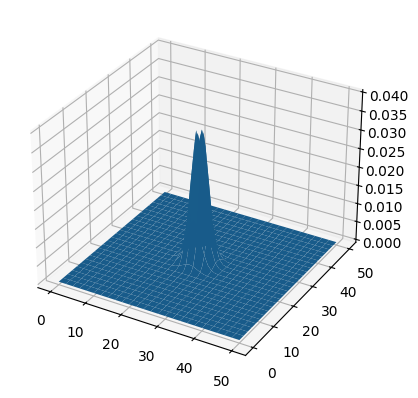

In [49]:
g51 = gaussian_kernel(51, 2)
X, Y = np.meshgrid(range(51), range(51))

fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')
ax.plot_surface(X, Y, g51)
plt.show()

(c) Manual convolution

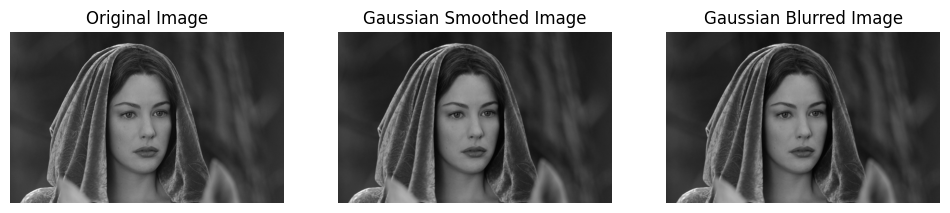

In [51]:
img = cv2.imread('/content/drive/MyDrive/Images/im02.png', cv2.IMREAD_GRAYSCALE)
img_n = cv2.normalize(img, None, 0, 255, cv2.NORM_MINMAX)

smoothed_manual = cv2.filter2D(img_n, -1, g5)
smoothed_cv = cv2.GaussianBlur(img_n, (5,5), 2)

plt.figure(figsize=(12,4))

plt.subplot(131); show(img_n, 'Original Image')
plt.subplot(132); show(smoothed_manual, 'Gaussian Smoothed Image')
plt.subplot(133); show(smoothed_cv, 'Gaussian Blurred Image')
plt.show()